**Image Classification using Convolutional Neural Network — Deep Learning in python**

Here the model is being built to clasify Jena Flowers 30 Dataset  .
Flower images of 30 wild-flowering angiosperm species found on semi-arid grasslands around the city of Jena in Germany. Classes are represented by 11 to 70 images with a total of 1,479 images. Class labels and definitions for training, validation and test splits for three folds are included as text files.

In [ ]:
#Import the Relevant libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
import os
from PIL import Image
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining directory
base_directory = '/content/drive/My Drive/Colab Notebooks/JPG/jpg'

filename = '/content/drive/My Drive/Colab Notebooks/JPG/classlabels.txt'


In [ ]:
# Resizing the Images and storing them in a new folder 
for filename in os.listdir(base_directory):
    #print(img_path+'/'+filename)
    new_width  = 128
    new_height = 128
    im1 = Image.open(base_directory+'/'+filename)
    im1 = im1.resize((new_width, new_height), Image.ANTIALIAS)
    im1.save('/content/drive/My Drive/Colab Notebooks/JPG/new/'+filename)

In [ ]:
# Segragating the Images in one list and their respective classlabel in another 
names = []
labels = []
dir = '/content/drive/My Drive/Colab Notebooks/JPG/new/'
with open('/content/drive/My Drive/Colab Notebooks/JPG/classlabels.txt', 'r') as f:
    for line in f.readlines():
        tokens = line.split(', ')
        names.append(dir+tokens[0])
        labels.append(int(tokens[1]))

In [ ]:
print(names)

['/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00001.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00002.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00003.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00004.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00006.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00008.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00009.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00010.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00018.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00020.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00021.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00022.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00023.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00024.jpg', '/content/drive/My Drive/Colab Notebooks/JPG/new/JFT_00026.jpg', '/content/drive/My Drive

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 1

In [ ]:
# Creating a tuple of the ablove two list containing Images and their respective class label
image_tup = zip(names, labels)

In [ ]:
print(image_tup)

In [ ]:
# Reading the Images and classlabels and storing them for classification modeling
import glob
import imageio
images = []
classlabel = []

#for image_path in glob.glob("/content/drive/My Drive/Colab Notebooks/JPG/jpg/*.jpg"):
for image_path , labels in image_tup:
    #im = imageio.imread(image_path)
    classlabel.append(labels)
    
    im1 = tf.keras.preprocessing.image.load_img(image_path,grayscale=False, color_mode='rgb',target_size=None)
    img1 = tf.keras.preprocessing.image.img_to_array(im1)
    img1 = img1/255
    images.append(img1)
    
    
    
   

In [ ]:
len(images)

1479

In [ ]:
# Check the shape of the image
images[0].shape

(128, 128, 3)

In [ ]:
# convert the images to np array to feed in the model
inputimage = np.array(images)

In [ ]:
inputimage.shape

(1479, 128, 128, 3)

In [ ]:
print(classlabel)

[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 1

In [ ]:
# Output or Y is the class label 
output = np.array(classlabel)

In [ ]:
output.shape

(1479,)

In [ ]:
# train test split
train_images, test_images, train_labels, test_labels = train_test_split(
    inputimage, output, train_size = 0.8, random_state =  90)

In [ ]:
train_images.shape

(1183, 128, 128, 3)

In [ ]:
train_labels.shape

(1183,)

In [ ]:
test_images.shape

(296, 128, 128, 3)

In [ ]:
test_labels.shape

(296,)

## **Preprocess the data**
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

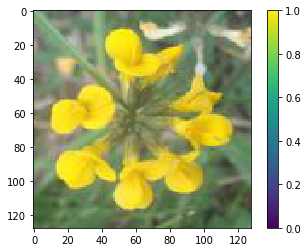

In [ ]:
# Print the first image of the train set
##plots
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

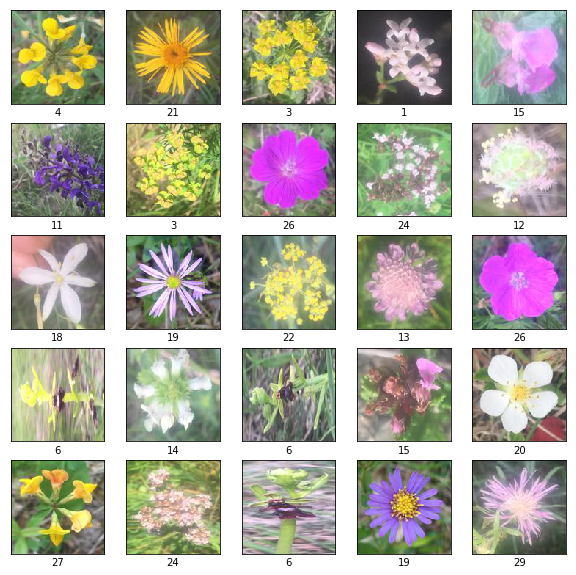

In [ ]:
# print the first few images of the train set
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## **Build the model**
Building the neural network requires configuring the layers of the model, then compiling the model.



In [ ]:
# build the Baseline model 
df_baseline = pd.read_csv('/content/drive/My Drive/Colab Notebooks/JPG/classlabels.txt', sep = ",", header=None)
df_baseline.columns = ["Im","Classas"]
baseline_accuracy = (df_baseline['Classas'].value_counts()).max()*100/len(df_baseline['Classas'])
print(baseline_accuracy)

4.732927653820148


As we can see the baseline accuracy is very less and hence we aim to build models which can perform better than this .

In [ ]:
#Build the Baseline CNN Model 

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

baseline_model = keras.Sequential([
    keras.layers.Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu, input_shape=(128,128,3)),
    keras.layers.Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu),
    keras.layers.Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(31, activation=tf.nn.softmax)
])

W0713 03:14:29.273283 140149981927296 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dense_1 (Dense)              (None, 31)                3

## **Compile the model**
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
baseline_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model
Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data:

In [ ]:
#Reshape Data
# Add extra dimension
train_images = train_images.reshape(-1,128, 128, 3)   
test_images = test_images.reshape(-1,128, 128, 3)


In [ ]:
Baseline_history = baseline_model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=6)

Train on 1183 samples, validate on 296 samples
Epoch 1/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 0.0180 - acc: 0.9966 - val_loss: 0.9210 - val_acc: 0.8243
Epoch 2/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 0.0038 - acc: 0.9992 - val_loss: 0.6344 - val_acc: 0.8615
Epoch 3/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 0.0708 - acc: 0.9899 - val_loss: 0.6115 - val_acc: 0.8514
Epoch 4/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 0.0064 - acc: 0.9992 - val_loss: 0.6360 - val_acc: 0.8412
Epoch 5/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5383 - val_acc: 0.8784
Epoch 6/6
1183/1183 [==============================] - 57s 48ms/sample - loss: 4.1061e-04 - acc: 1.0000 - val_loss: 0.5606 - val_acc: 0.8818


Plot History

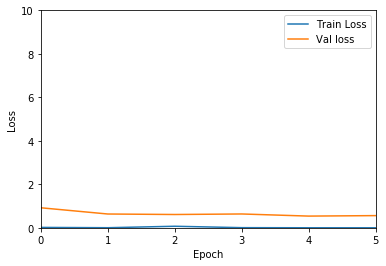

In [ ]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 10])
    plt.xlim([0,5])

plot_history(Baseline_history)

Make predictions
With the model trained, we can use it to make predictions about some images


In [ ]:
Baseline_predictions = baseline_model.predict(test_images)

In [ ]:
Baseline_predictions[0]

array([4.50712144e-29, 4.98477111e-18, 9.97044981e-01, 2.72150435e-20,
       5.16626037e-28, 5.63794616e-15, 2.95393294e-13, 8.28172832e-17,
       9.32043470e-11, 1.16998976e-07, 2.21753193e-12, 3.40877295e-06,
       2.16477282e-18, 4.52225757e-11, 1.64964084e-23, 1.97652895e-07,
       3.51022883e-22, 3.76332546e-15, 3.54871918e-16, 2.90778296e-12,
       1.53246183e-14, 1.66164258e-21, 2.07331084e-21, 3.88698736e-19,
       2.82373325e-08, 3.81503171e-21, 6.52353078e-17, 3.44820165e-19,
       4.03312271e-07, 2.95087299e-03, 2.97897207e-19], dtype=float32)

In [ ]:
np.argmax(Baseline_predictions[0])

2

In [ ]:
# Correct Prediction done 
test_labels[0]

2

****

## **Build another CNN Model with diffrent Layer and structure**

In [ ]:
# Another Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output classes are 30
model.add(Dense(31))
model.add(Activation('softmax'))

W0713 03:31:54.604851 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 03:31:54.607728 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 03:31:54.611513 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 03:31:54.650207 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 03:31:54.654459 140149981927296 deprecation_wrapp

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        9248      
__________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0713 03:32:01.026424 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 03:32:01.060159 140149981927296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
model_history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=6)

Train on 1183 samples, validate on 296 samples
Epoch 1/6
1183/1183 [==============================] - 83s 70ms/step - loss: 0.8192 - acc: 0.7346 - val_loss: 0.8911 - val_acc: 0.7264
Epoch 2/6
1183/1183 [==============================] - 84s 71ms/step - loss: 0.6317 - acc: 0.7946 - val_loss: 0.6719 - val_acc: 0.8074
Epoch 3/6
1183/1183 [==============================] - 84s 71ms/step - loss: 0.6210 - acc: 0.8047 - val_loss: 0.7265 - val_acc: 0.7365
Epoch 4/6
1183/1183 [==============================] - 84s 71ms/step - loss: 0.4215 - acc: 0.8749 - val_loss: 0.6414 - val_acc: 0.7872
Epoch 5/6
1183/1183 [==============================] - 83s 71ms/step - loss: 0.2729 - acc: 0.9104 - val_loss: 0.6915 - val_acc: 0.8041
Epoch 6/6
1183/1183 [==============================] - 83s 71ms/step - loss: 0.3464 - acc: 0.8817 - val_loss: 0.6122 - val_acc: 0.8041


In [ ]:
model_history.history

{'acc': [0.7345731185335077,
  0.79459002470426,
  0.8047337279114195,
  0.8748943364831823,
  0.9103972942569148,
  0.8816568039779631],
 'loss': [0.8192339308263886,
  0.6316802803480515,
  0.6209906228296049,
  0.42154513978393826,
  0.272859050702565,
  0.34641236685285703],
 'val_acc': [0.7263513513513513,
  0.8074324324324325,
  0.7364864864864865,
  0.7871621621621622,
  0.8040540540540541,
  0.8040540540540541],
 'val_loss': [0.8910588928171106,
  0.6718838440405356,
  0.7264856776675662,
  0.6414424986452669,
  0.6915138903501872,
  0.6122080216536651]}

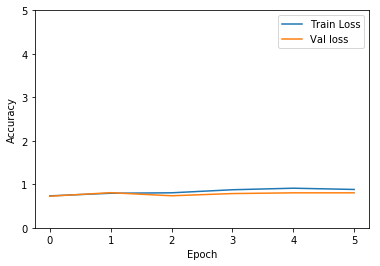

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(model_history)

## **Lets Predict ...**

In [ ]:
model_predictions = model.predict(test_images)

In [ ]:
model_predictions[1]

array([1.6366672e-08, 7.8363126e-05, 1.3502846e-08, 4.7412995e-04,
       8.3972431e-08, 3.0403942e-09, 3.3396308e-04, 1.5746546e-03,
       2.3459933e-07, 3.0621443e-08, 2.4952508e-06, 2.2358890e-09,
       6.5687871e-01, 1.5510683e-07, 3.3130369e-01, 9.2970163e-07,
       2.5732424e-03, 1.8260572e-08, 2.4312439e-07, 1.0553879e-05,
       2.9998762e-03, 3.3297486e-04, 2.9568532e-03, 4.2890277e-04,
       1.5959213e-07, 5.7149064e-06, 1.8757826e-08, 4.2407348e-05,
       8.3813578e-09, 8.2453600e-09, 1.5622269e-06], dtype=float32)

In [ ]:
np.argmax(model_predictions[1])

12

In [ ]:
# The model built earlier predicts correctly
test_labels[1]

12

## Fine Tuning with the help of existing Model VGG16
**Lets Improve the Model by applying CNN Architecture VGG16**

In [ ]:
# First, we will load a VGG model without the top layer ( which consists of fully connected layers ).
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

In [ ]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 # Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f76e6faf9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f76e6faf358> False
<keras.layers.convolutional.Conv2D object at 0x7f76e6faf048> False
<keras.layers.pooling.MaxPooling2D object at 0x7f76e6f754e0> False
<keras.layers.convolutional.Conv2D object at 0x7f76e7328780> False
<keras.layers.convolutional.Conv2D object at 0x7f76e743d320> False
<keras.layers.pooling.MaxPooling2D object at 0x7f76e743db00> False
<keras.layers.convolutional.Conv2D object at 0x7f76e74801d0> False
<keras.layers.convolutional.Conv2D object at 0x7f76e75bfba8> False
<keras.layers.convolutional.Conv2D object at 0x7f76e7494c88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f76e7447f28> False
<keras.layers.convolutional.Conv2D object at 0x7f76e7447b00> False
<keras.layers.convolutional.Conv2D object at 0x7f76e968ec50> False
<keras.layers.convolutional.Conv2D object at 0x7f76ef564eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f76e857c588>

Now that we have set the trainable parameters of our base network, we would like to add a classifier on top of the convolutional base. We will simply add a fully connected layer followed by a softmax layer with 30 outputs. This is done as given below

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
modelvgg = models.Sequential()
 
# Add the vgg convolutional base model
modelvgg.add(vgg_conv)
 
# Add new layers
 
modelvgg.add(Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu, input_shape=(128,128,3)))
modelvgg.add(Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu))
modelvgg.add(Conv2D(32, (2, 2), padding='same', activation=tf.nn.relu))
modelvgg.add(MaxPooling2D(pool_size=(2, 2)))

modelvgg.add(Flatten())
modelvgg.add(Dense(128, activation=tf.nn.relu))
modelvgg.add(Dense(31, activation=tf.nn.softmax))
             # Show a summary of the model. Check the number of trainable parameters
modelvgg.summary()
             

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          65568     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 32)          4128      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 32)          4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
__________

In [ ]:
modelvgg.compile(optimizers.RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_modelvgg = modelvgg.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=6)

Train on 1183 samples, validate on 296 samples
Epoch 1/6
1183/1183 [==============================] - 291s 246ms/step - loss: 3.0076 - acc: 0.2012 - val_loss: 2.3281 - val_acc: 0.3649
Epoch 2/6
1183/1183 [==============================] - 290s 245ms/step - loss: 1.8305 - acc: 0.5072 - val_loss: 1.5103 - val_acc: 0.5203
Epoch 3/6
1183/1183 [==============================] - 291s 246ms/step - loss: 1.0017 - acc: 0.7058 - val_loss: 1.1503 - val_acc: 0.6419
Epoch 4/6
1183/1183 [==============================] - 290s 245ms/step - loss: 0.6119 - acc: 0.8233 - val_loss: 0.9772 - val_acc: 0.6993
Epoch 5/6
1183/1183 [==============================] - 290s 246ms/step - loss: 0.5247 - acc: 0.8495 - val_loss: 0.3680 - val_acc: 0.8885
Epoch 6/6
1183/1183 [==============================] - 291s 246ms/step - loss: 0.4403 - acc: 0.8791 - val_loss: 0.4095 - val_acc: 0.8615


We can see that the Accuracy for Validation has increased from the previous models

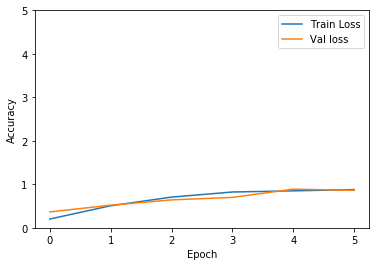

In [ ]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history_modelvgg)

In [ ]:
history_modelvgg.history

{'acc': [0.2011834315999725,
  0.5071851229224281,
  0.7058326284560932,
  0.8233305157893609,
  0.8495350795485463,
  0.8791208791712635],
 'loss': [3.0076357687517232,
  1.8305290155459135,
  1.0016576033573683,
  0.6119239004809073,
  0.5246797182226423,
  0.44034265237447073],
 'val_acc': [0.36486486486486486,
  0.5202702702702703,
  0.6418918918918919,
  0.6993243243243243,
  0.8885135135135135,
  0.8614864864864865],
 'val_loss': [2.32809642843298,
  1.5102835313693896,
  1.1503418071849927,
  0.977172123419272,
  0.368020329926465,
  0.4094510738914077]}

## **Let us see the loss and accuracy curves**

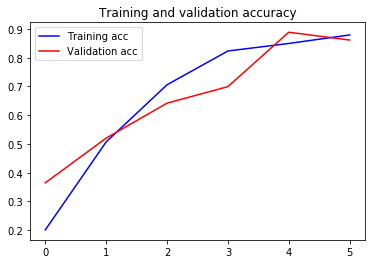

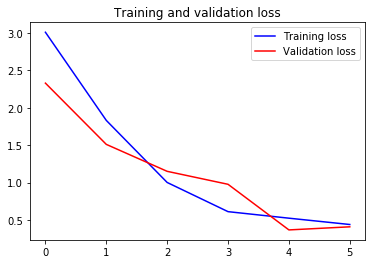

In [ ]:
acc = history_modelvgg.history['acc']
val_acc = history_modelvgg.history['val_acc']
loss = history_modelvgg.history['loss']
val_loss = history_modelvgg.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
modelvgg_predictions = modelvgg.predict(test_images)

In [ ]:
modelvgg_predictions[6]

array([1.1226712e-05, 2.2132096e-03, 5.1240448e-07, 1.6872727e-04,
       1.2027808e-06, 2.3643403e-05, 2.0265816e-06, 5.3503648e-03,
       1.3606027e-05, 2.8694441e-04, 1.5947186e-05, 1.8501813e-05,
       3.4396176e-04, 1.7755170e-05, 1.9513391e-05, 3.5009660e-05,
       4.8323077e-08, 2.2322982e-05, 3.2396204e-06, 8.9515343e-06,
       8.3012623e-04, 1.2946634e-07, 2.4215762e-04, 4.0965744e-05,
       9.8992997e-01, 3.8686601e-04, 3.1879699e-07, 4.4248085e-09,
       8.8679935e-06, 1.3302313e-06, 2.5459153e-06], dtype=float32)

In [ ]:
np.argmax(modelvgg_predictions[6])

24

In [ ]:
# The model predicts successfully 
test_labels[6]

24